In [29]:
import pandas as pd
import pyodbc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay





In [30]:
sales_go = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:/Users/Jonat/Downloads/GO-databases schoon/go_sales_schoon.accdb;')

In [31]:
product = pd.read_sql("SELECT * FROM product", sales_go)
product_type = pd.read_sql("SELECT * FROM product_type", sales_go)
return_item = pd.read_sql("SELECT DISTINCT * FROM returned_item", sales_go)
klant = pd.read_sql("SELECT * FROM sales_retailer_site", sales_go)
return_reason = pd.read_sql("SELECT * FROM return_reason", sales_go)
country = pd.read_sql("SELECT * FROM sales_country", sales_go)
order_details = pd.read_sql("SELECT * FROM order_details", sales_go)
order_header = pd.read_sql("SELECT * FROM order_header", sales_go)
order_method = pd.read_sql("SELECT * FROM order_method", sales_go)
product_line = pd.read_sql("SELECT * FROM product_line", sales_go)

C:\Users\Jonat\AppData\Local\Temp\ipykernel_6024\1052911171.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product = pd.read_sql("SELECT * FROM product", sales_go)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_6024\1052911171.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_type = pd.read_sql("SELECT * FROM product_type", sales_go)
C:\Users\Jonat\AppData\Local\Temp\ipykernel_6024\1052911171.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return_item = pd.read_sql("SELECT DISTINCT * FROM returned_item", sal

# Data Merging

In [32]:
productfull = pd.merge(product, product_type)
productfull = pd.merge(productfull, product_line)
productfull 

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_EN
0,53,10-1-2021,8,28.55,.28,P53ME2CA8.jpg,EN,Firefly Climbing Lamp,This climbing lamp is water-resistant. It come...,2,Climbing Accessories,Mountaineering Equipment
1,54,10-1-2021,8,35.33,.33,P54ME2CA8.jpg,EN,Firefly Charger,Power charger for the Firefly Climbing Lamp. T...,2,Climbing Accessories,Mountaineering Equipment
2,55,10-1-2021,8,4,.5,P55ME2CA8.jpg,EN,Firefly Rechargeable Battery,Rechargeable battery pack for the Firefly Clim...,2,Climbing Accessories,Mountaineering Equipment
3,56,10-1-2021,8,9,.5,P56ME2CA8.jpg,EN,Granite Chalk Bag,Nylon web bag perfect for holding several stic...,2,Climbing Accessories,Mountaineering Equipment
4,50,10-1-2021,8,2,.5,P50ME2CA8.jpg,EN,Granite Carabiner,Made from 12 mm rod stock aluminum and a radiu...,2,Climbing Accessories,Mountaineering Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...
110,37,5-3-2013,5,28.75,.37,P37CE1LT5.jpg,EN,EverGlow Double,Light output approximates a 175 W bulb. Double...,1,Lanterns,Camping Equipment
111,38,5-3-2013,5,20,.33,P38CE1LT5.jpg,EN,EverGlow Kerosene,One of the most dependable sources of light in...,1,Lanterns,Camping Equipment
112,39,5-3-2013,5,40.63,.37,P39CE1LT5.jpg,EN,EverGlow Butane,Adjustable brightness control with auto igniti...,1,Lanterns,Camping Equipment
113,40,15-2-2011,5,17.97,.28,P40CE1LT5.jpg,EN,EverGlow Lamp,"Perfect for in your tent, this lamp comes with...",1,Lanterns,Camping Equipment


In [33]:
returnfull = pd.merge(return_item, return_reason)
returnfull = pd.merge(returnfull, order_details[['ORDER_DETAIL_CODE', 'ORDER_NUMBER']])
returnfull = pd.merge(returnfull, order_header [['ORDER_NUMBER', 'RETAILER_NAME']])
returnfull = pd.merge(returnfull, order_details[['ORDER_DETAIL_CODE', 'PRODUCT_NUMBER']])
returnfull = pd.merge(returnfull, productfull)
returnfull

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,RETURN_DESCRIPTION_EN,ORDER_NUMBER,RETAILER_NAME,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_EN
0,1491,1-8-2021 04:10:24,84858,5,8,Unsatisfactory product,7446,Ausr³stungshaus Globetrotter,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
1,1918,25-4-2022 22:56:33,98653,5,22,Unsatisfactory product,8239,Beter Buitenleven,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
2,1566,28-7-2020 09:24:15,47783,4,20,Wrong product shipped,1415,Falcon Outfitters,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
3,1917,15-10-2022 17:45:46,98648,3,28,Wrong product ordered,8317,Beter Buitenleven,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
4,1502,27-8-2022 20:52:27,85850,5,30,Unsatisfactory product,7457,Outdoor-Fachgeschõft M³ller,29,5-3-2013,4,41.18,.4,P29CE1PK4.jpg,EN,Canyon Mule Carryall,"This pack has a large capacity, perfect for ca...",1,Packs,Camping Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2287,11-5-2021 06:15:02,60732,1,2,Defective product,5121,"ArtÝculos de Campismo El Aquila, S.A. de C.V.",51,10-1-2021,8,35,.5,P51ME2CA8.jpg,EN,Granite Belay,The Granite Belay is an ingenious single rope ...,2,Climbing Accessories,Mountaineering Equipment
702,2298,14-12-2021 11:28:50,100250,1,6,Defective product,9254,Naranco de Bulnes,43,10-1-2021,6,126.66,.33,P42ME2RP6.jpg,EN,Husky Rope 60,11 mm diameter standard rope. Length: 60 m. W...,2,Rope,Mountaineering Equipment
703,2344,18-8-2022 17:42:13,50150,1,8,Defective product,1363,Ultra Sports,90,15-2-2011,15,2.5,.63,P86OP4IR15.jpg,EN,BugShield Extreme,"Highest amount of the active ingredient, 38%, ...",4,Insect Repellents,Outdoor Protection
704,2347,28-8-2020 12:30:24,109838,1,6,Defective product,9467,Preben's T°y,93,15-2-2011,16,2,.6,P91OP4SS16.jpg,EN,Sun Shelter 15,SPF 15 protects against all harmful rays.,4,Sunscreen,Outdoor Protection


In [34]:
Final_Table = returnfull
Final_Table

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,RETURN_DESCRIPTION_EN,ORDER_NUMBER,RETAILER_NAME,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN,PRODUCT_LINE_EN
0,1491,1-8-2021 04:10:24,84858,5,8,Unsatisfactory product,7446,Ausr³stungshaus Globetrotter,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
1,1918,25-4-2022 22:56:33,98653,5,22,Unsatisfactory product,8239,Beter Buitenleven,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
2,1566,28-7-2020 09:24:15,47783,4,20,Wrong product shipped,1415,Falcon Outfitters,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
3,1917,15-10-2022 17:45:46,98648,3,28,Wrong product ordered,8317,Beter Buitenleven,6,5-3-2013,1,85.11,.28,P06CE1CG1.jpg,EN,TrailChef Deluxe Cook Set,"Cascade set features 1, 2, and 3 liter pots wi...",1,Cooking Gear,Camping Equipment
4,1502,27-8-2022 20:52:27,85850,5,30,Unsatisfactory product,7457,Outdoor-Fachgeschõft M³ller,29,5-3-2013,4,41.18,.4,P29CE1PK4.jpg,EN,Canyon Mule Carryall,"This pack has a large capacity, perfect for ca...",1,Packs,Camping Equipment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2287,11-5-2021 06:15:02,60732,1,2,Defective product,5121,"ArtÝculos de Campismo El Aquila, S.A. de C.V.",51,10-1-2021,8,35,.5,P51ME2CA8.jpg,EN,Granite Belay,The Granite Belay is an ingenious single rope ...,2,Climbing Accessories,Mountaineering Equipment
702,2298,14-12-2021 11:28:50,100250,1,6,Defective product,9254,Naranco de Bulnes,43,10-1-2021,6,126.66,.33,P42ME2RP6.jpg,EN,Husky Rope 60,11 mm diameter standard rope. Length: 60 m. W...,2,Rope,Mountaineering Equipment
703,2344,18-8-2022 17:42:13,50150,1,8,Defective product,1363,Ultra Sports,90,15-2-2011,15,2.5,.63,P86OP4IR15.jpg,EN,BugShield Extreme,"Highest amount of the active ingredient, 38%, ...",4,Insect Repellents,Outdoor Protection
704,2347,28-8-2020 12:30:24,109838,1,6,Defective product,9467,Preben's T°y,93,15-2-2011,16,2,.6,P91OP4SS16.jpg,EN,Sun Shelter 15,SPF 15 protects against all harmful rays.,4,Sunscreen,Outdoor Protection


In [35]:
Final_Table = Final_Table.drop(["PRODUCT_LINE_EN","PRODUCT_TYPE_EN","INTRODUCTION_DATE","RETAILER_NAME","RETURN_DESCRIPTION_EN","DESCRIPTION","PRODUCT_NAME", "ORDER_NUMBER", "RETURN_DATE", "ORDER_DETAIL_CODE", "PRODUCTION_COST", "MARGIN", "LANGUAGE", "PRODUCT_IMAGE"], axis = 1)
Final_Table

,RETURN_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,PRODUCT_NUMBER,PRODUCT_TYPE_CODE,PRODUCT_LINE_CODE
0,1491,5,8,6,1,1
1,1918,5,22,6,1,1
2,1566,4,20,6,1,1
3,1917,3,28,6,1,1
4,1502,5,30,29,4,1
...,...,...,...,...,...,...
701,2287,1,2,51,8,2
702,2298,1,6,43,6,2
703,2344,1,8,90,15,4
704,2347,1,6,93,16,4


## In this section...
The independent and dependent variable gets selected here, a training and test set gets made for these variables and then they are placed into the decision tree model to be trained. The model Classifier was used because the problem i am intending to solve involves categorical variables.
After training the model it is then put to the test, to see if it can predict new data. It came out to be 47% accurate.


In [36]:
y = Final_Table[['RETURN_REASON_CODE']] #dependent variable
X = Final_Table.drop(['RETURN_REASON_CODE'], axis = 1)
X = pd.get_dummies(X, drop_first=True)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# Create a decision tree classifier
classist = DecisionTreeClassifier(max_depth=4)

# Train the model on the training dataset
classist.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [39]:
y_pred = classist.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4788732394366197


In [40]:
tree_text = export_text(classist, feature_names=X.columns.tolist())
print(tree_text)

# Visualize the decision tree using plt
fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(classist, filled=True, feature_names=X.columns.tolist(), class_names=y['RETURN_REASON_CODE'].unique(), ax=ax)
plt.show()

|--- RETURN_QUANTITY_2 <= 0.50
|   |--- RETURN_QUANTITY_4 <= 0.50
|   |   |--- RETURN_QUANTITY_6 <= 0.50
|   |   |   |--- RETURN_QUANTITY_8 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- RETURN_QUANTITY_8 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- RETURN_QUANTITY_6 >  0.50
|   |   |   |--- PRODUCT_LINE_CODE_5 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- PRODUCT_LINE_CODE_5 >  0.50
|   |   |   |   |--- class: 5
|   |--- RETURN_QUANTITY_4 >  0.50
|   |   |--- PRODUCT_TYPE_CODE_18 <= 0.50
|   |   |   |--- PRODUCT_TYPE_CODE_6 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- PRODUCT_TYPE_CODE_6 >  0.50
|   |   |   |   |--- class: 2
|   |   |--- PRODUCT_TYPE_CODE_18 >  0.50
|   |   |   |--- PRODUCT_NUMBER_104 <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- PRODUCT_NUMBER_104 >  0.50
|   |   |   |   |--- class: 4
|--- RETURN_QUANTITY_2 >  0.50
|   |--- PRODUCT_TYPE_CODE_17 <= 0.50
|   |   |--- PRODUCT_NUMBER_108 <= 0.50
|   |   |   |--- PRODUCT_NUMBER_65

In [41]:
accuracy = metrics.accuracy_score(y_test, y_pred)
y_pred = classist.predict(X_test)
accuracy


0.4788732394366197

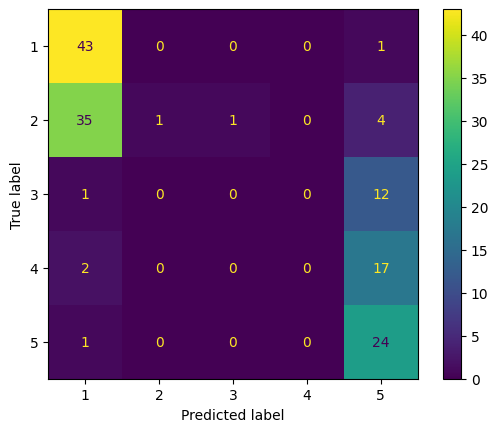

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=classist.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classist.classes_)
disp.plot()

plt.show()
